Implemente o classificador KNN para criar um modelo, usando KNN, o qual prevê quais passageiros sobreviveram ao naufrágio do Titanic.


**Dataset:** Titanic: Machine Learning from Disaster --> https://www.kaggle.com/c/titanic/data

Partindo dos conceitos aprendidos na aula de KNN, crie um notebook jupyter com as seguintes tarefas:

1. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)
2. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta
3. Transformar as features categóricas em numéricas (tip: pandas ou scikit-learn)
4. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)
5. Selecionar as features baseada na correlação (tip: pandas)
6. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)
7. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]
8. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [ ]:
# Al. Bruna Maia - 499257
# Tácio Soares Aguiar - 485214
# Pedro Amaral Fontes de Sales - 496223
# Alessandro Souza Silva - 521913
# Francisco Mateus dos Anjos Silva - 521783

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#Loading dataset
titanic = sns.load_dataset('titanic')

In [ ]:
##Dataset preview
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
##Descartando colunas desnecessárias
titanic.drop(['sibsp', 'parch', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)

In [ ]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,alone
0,0,3,male,22.0,7.2500,S,False
1,1,1,female,38.0,71.2833,C,False
2,1,3,female,26.0,7.9250,S,True
3,1,1,female,35.0,53.1000,S,False
4,0,3,male,35.0,8.0500,S,True


In [ ]:
##Converting categorical atributes to numerical
le = LabelEncoder()
titanic['sex_encoded'] = le.fit_transform(titanic['sex'])
titanic['embarked_encoded'] = le.fit_transform(titanic['embarked'])
titanic['alone_encoded'] = le.fit_transform(titanic['alone'])

In [ ]:
titanic_encoded = titanic.copy()

In [ ]:
##Dropping unencoded categorical attributes
titanic_encoded.drop(['sex', 'embarked', 'alone'], axis=1, inplace=True)

In [ ]:
titanic_encoded.head()

,survived,pclass,age,fare,sex_encoded,embarked_encoded,alone_encoded
0,0,3,22.0,7.2500,1,2,0
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,2,1
3,1,1,35.0,53.1000,0,2,0
4,0,3,35.0,8.0500,1,2,1


In [ ]:
##Min/max encoding
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

In [ ]:
##Normalizing numerical data
titanic_normalized = minmax_norm(titanic_encoded)

In [ ]:
##Correlação
#method{‘pearson’, ‘kendall’, ‘spearman’} or callable
#    Method of correlation:
#
#        pearson : standard correlation coefficient
#
#        kendall : Kendall Tau correlation coefficient
#
#        spearman : Spearman rank correlation

titanic_normalized.corr()

,survived,pclass,age,fare,sex_encoded,embarked_encoded,alone_encoded
survived,1.000000,-0.338481,-0.077221,0.257307,-0.543351,-0.163517,-0.203367
pclass,-0.338481,1.000000,-0.369226,-0.549500,0.131900,0.157112,0.135207
age,-0.077221,-0.369226,1.000000,0.096067,0.093254,-0.025252,0.198270
fare,0.257307,-0.549500,0.096067,1.000000,-0.182333,-0.221226,-0.271832
sex_encoded,-0.543351,0.131900,0.093254,-0.182333,1.000000,0.104057,0.303646
embarked_encoded,-0.163517,0.157112,-0.025252,-0.221226,0.104057,1.000000,0.065610
alone_encoded,-0.203367,0.135207,0.198270,-0.271832,0.303646,0.065610,1.000000


In [ ]:
#Keeping the top 3 correlations
titanic_normalized.drop(['age', 'embarked_encoded', 'alone_encoded'], axis=1, inplace=True)

In [ ]:
X = titanic_normalized.iloc[:,1:].values #mudei aqui pra testar pq a classe KNN trabalha apenas com numpy
y = titanic_normalized.iloc[:,:1].values.reshape(-1,1) #mudei aqui pra testar pq a classe KNN trabalha apenas com numpy
##Divisão teste/treino/validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [ ]:
##Generating k values
k_values = list()
k=1
for i in range(30):
    k_values.append(k)
    k += 4

In [ ]:
import numpy as np

class KNN ( object ):

    #Inicializa o modelo
    def __init__( self, k, distance="euclidean" ):
        
        self.K = k
        
        self.DISTANCE = distance #distance="manhattan" ou distance="euclidean"
        
        self.X_train = None
        
        self.Y_train = None
        
        self.Y_predict = None

    #Treina o modelo
    def fit( self, X, Y ):
        
        self.X_train = np.array(X)

        self.Y_train = np.array(Y)

    #Calcula a distância entre duas instâncias
    def __distance_calculator( self, x1, x2 ):
        
        if self.DISTANCE == "manhattan":
            
            return np.sum( np.absolute( x1 - x2 ) )
        
        else:
            
            return np.sqrt( np.sum( ( x1 - x2 )**2 ) )

    #Retorna os indices dos k vizinhos mais próximos de x1
    def __find_k_neighborhoods( self, x1 ):
        
        distances = []
        
        for x2 in self.X_train:
            
            distance = self.__distance_calculator( x1, x2 )
            
            distances.append( distance )
            
        k_neighborhoods = np.argpartition( distances, self.K )[: self.K]

        return k_neighborhoods

    #Retorna a classe/label com maior ocorrência na vizinhança
    def __label_calculator( self, k_neighborhoods ):
    
        labels = self.Y_train[ k_neighborhoods ].flatten()
        
        y = np.bincount( labels ).argmax()
        
        return y

    #Prediz a classe/label dos dados de entrada
    def predict( self, X_predict ):
        
        X_predict = np.array(X_predict)
        
        Y_predict = []
        
        for x1 in X_predict:
            
            k_neighborhoods = self.__find_k_neighborhoods( x1 )
            
            y = self.__label_calculator( k_neighborhoods )
            
            Y_predict.append( y )
            
        self.Y_predict = np.array(Y_predict).reshape(-1,1)

        return self.Y_predict

In [ ]:
##Testing all k values generated
results = list()
for k in k_values:
    model = KNN(k, distance='euclidian') #Teste para k = 1
    #X_train, X_test, y_train, y_test
    model.fit(X_train, y_train.astype(int)) #Foi preciso o Y (label/classe) ser inteiro
    y_pred = model.predict(X_val)
    results.append(accuracy_score(y_val, y_pred)) #Fazendo a predição no conjunto de teste

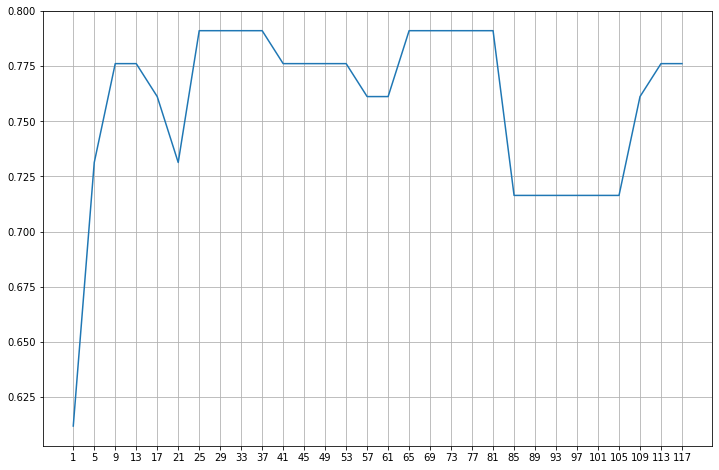

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(k_values, results)
plt.grid()
plt.xticks(np.arange(1, 121, step=4));  # Set label locations.

In [ ]:
##Accuracy
model = KNN(k=29, distance='euclidian') 
model.fit(X_train, y_train.astype(int)) #Foi preciso o Y (label/classe) ser inteiro
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred) 

0.7847533632286996

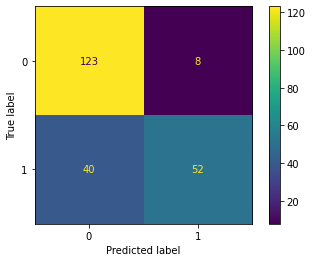

In [ ]:
##Confusion matrix - 1 survived / 0 didn't survive
conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf)
disp.plot();

Ao analisarmos a matriz de confusão, podemos observar que nosso modelo predisse que: 
- 123 pessoas não sobreviveram e o modelo acertou; 
- 40 pessoas não sobreviveram e o modelo errou; 
- 8 pessoas sobreviveram e o modelo errou e; 
- 52 pessoas sobreviveram e o modelo acertou.